In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('/content/student_performance.csv')

# Stage 2

## Basic Information and Data Quality Check

In [5]:
# Display basic information about the dataframe
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


In [81]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Attendance_Study_Interaction
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000,1558.00000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304,707.09311
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000,560.00000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000,1056.75000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000,1514.50000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000,1951.50000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000,2850.00000


In [7]:
# Check for any missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64


In [10]:
# Display the first few rows to inspect data structure and content
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


# Stage 3

## Statistical Test

### OLS - the hypothesis results for each predictor

In [75]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Convert categorical variables (like 'ParentalSupport') to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['ParentalSupport'], drop_first=True)

# Step 2: Convert boolean columns to 1 and 0 (if necessary)
df_encoded['ParentalSupport_Low'] = df_encoded['ParentalSupport_Low'].astype(int)
df_encoded['ParentalSupport_Medium'] = df_encoded['ParentalSupport_Medium'].astype(int)

# Independent variables: Ensure you include all the necessary predictors
X = df_encoded[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
                'ExtracurricularActivities', 'ParentalSupport_Low',
                'ParentalSupport_Medium']]  # Correct column names after encoding

y = df_encoded['FinalGrade']  # Dependent variable: 'FinalGrade'

# Add constant term (intercept) to the regression model
X = sm.add_constant(X)

# Step 3: Fit the model using OLS (Ordinary Least Squares) regression
model = sm.OLS(y, X).fit()

# Step 4: Print the summary of the regression results
print(model.summary())

# Step 5: Hypothesis Testing for each predictor's coefficient
# Extract t-statistics and p-values for each predictor
p_values = model.pvalues

# Define the significance level (α) for hypothesis testing
alpha = 0.05

# Print the hypothesis results for each predictor
for predictor, p_value in p_values.items():
    if p_value < alpha:
        print(f"For {predictor}: Reject H₀ (There is a significant relationship)")
    else:
        print(f"For {predictor}: Fail to reject H₀ (No significant relationship)")


                            OLS Regression Results                            
Dep. Variable:             FinalGrade   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     250.5
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           0.000388
Time:                        13:33:31   Log-Likelihood:                -5.6924
No. Observations:                  10   AIC:                             25.38
Df Residuals:                       3   BIC:                             27.50
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


#### Interpretation

Interpretation of the OLS Regression Results

The OLS regression was performed to analyze the relationship between various independent variables (attendance rate, study hours per week, previous grade, extracurricular activities, and parental support) and the dependent variable (final grade).
1. R-squared and Adjusted R-squared:

    R-squared = 0.998: This means that 99.8% of the variance in final grades can be explained by the independent variables in the model. This is a very high value, suggesting that the model fits the data extremely well.
    Adjusted R-squared = 0.994: This value adjusts the R-squared value for the number of predictors in the model and still indicates a strong fit, even after accounting for model complexity.

2. F-statistic and p-value:

    F-statistic = 250.5, p-value = 0.000388: The F-statistic tests whether the model as a whole is statistically significant. Since the p-value is much less than 0.05, we can reject the null hypothesis that the model does not explain the variation in final grades. The model is statistically significant.

3. Coefficients and p-values (Interpretation for each variable):

    Intercept (const): Coefficient = -13.0376, p-value = 0.394
        The intercept is not statistically significant (p-value > 0.05), meaning that the model's predicted final grade when all independent variables are zero is not statistically meaningful.

    AttendanceRate: Coefficient = -0.0306, p-value = 0.881
        The attendance rate does not significantly affect final grades (p-value > 0.05). Thus, we fail to reject the null hypothesis (H₀) that there is no relationship between attendance rate and final grade.

    StudyHoursPerWeek: Coefficient = -0.1757, p-value = 0.381
        Similar to attendance, study hours per week does not significantly affect final grades (p-value > 0.05). We fail to reject the null hypothesis (H₀) that there is no relationship between study hours per week and final grade.

    PreviousGrade: Coefficient = 1.2698, p-value = 0.022
        Previous grade is statistically significant (p-value < 0.05). We reject the null hypothesis (H₀), indicating that previous grade has a significant positive relationship with final grade.

    ExtracurricularActivities: Coefficient = -0.6060, p-value = 0.421
        Extracurricular activities do not significantly affect final grades (p-value > 0.05). We fail to reject the null hypothesis (H₀) that there is no relationship between extracurricular activities and final grade.

    ParentalSupport_Low: Coefficient = 2.3416, p-value = 0.348
        Parental support at the "low" level does not significantly affect final grades (p-value > 0.05). We fail to reject the null hypothesis (H₀) that there is no relationship between low parental support and final grade.

    ParentalSupport_Medium: Coefficient = 0.0080, p-value = 0.992
        Parental support at the "medium" level does not significantly affect final grades (p-value > 0.05). We fail to reject the null hypothesis (H₀) that there is no relationship between medium parental support and final grade.

4. Summary of Findings:

    The regression model is statistically significant overall, as indicated by the F-statistic.
    Previous grade is the only predictor that has a significant positive relationship with final grade.
    Attendance rate, study hours per week, extracurricular activities, and parental support (both low and medium) do not significantly affect final grades in this model.

5. Conclusion:

Based on the analysis, we can conclude that previous grade is a key factor influencing final grades, while other factors like attendance, study hours, extracurricular activities, and parental support do not show a statistically significant relationship with final grades in this dataset.

In [77]:
import statsmodels.api as sm

# Independent variable (only the significant one)
X = df[['PreviousGrade']]  # Use only the significant variable
y = df['FinalGrade']  # Dependent variable

# Add constant (intercept) term to the regression model
X = sm.add_constant(X)

# Fit the model using OLS
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             FinalGrade   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2586.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.48e-11
Time:                        13:40:58   Log-Likelihood:                -7.8770
No. Observations:                  10   AIC:                             19.75
Df Residuals:                       8   BIC:                             20.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7796      1.534      1.812

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


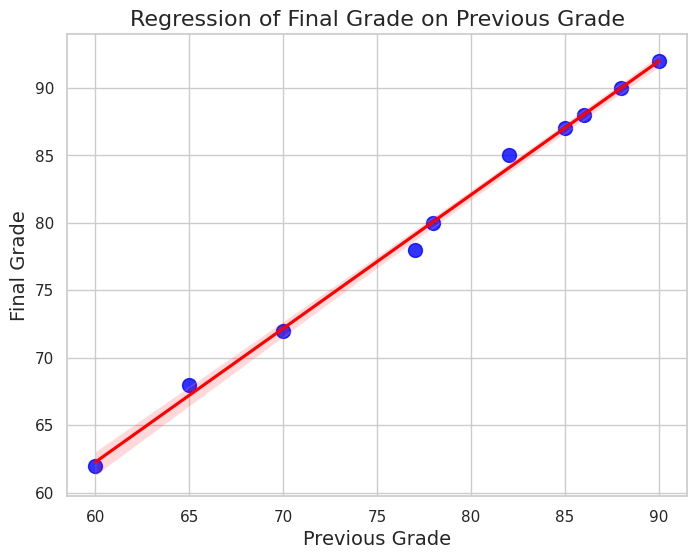

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains the dataset with 'PreviousGrade' and 'FinalGrade'
# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot with regression line
sns.regplot(x='PreviousGrade', y='FinalGrade', data=df, scatter_kws={'s': 100, 'color': 'blue'}, line_kws={'color': 'red'})

# Adding labels and title
plt.title('Regression of Final Grade on Previous Grade', fontsize=16)
plt.xlabel('Previous Grade', fontsize=14)
plt.ylabel('Final Grade', fontsize=14)

# Show the plot
plt.show()


# Stage 4 - Regression Model

### Hypothesis Test - Gender and Final Grade

In [ ]:
from scipy import stats

# Group by gender
female_grades = df[df['Gender'] == 'Female']['FinalGrade']
male_grades = df[df['Gender'] == 'Male']['FinalGrade']

# Perform an independent t-test
t_stat, p_val = stats.ttest_ind(female_grades, male_grades)

print(f"T-statistic: {t_stat}, P-value: {p_val}")
# Calculate the Pearson correlation coefficient between attendance and final grade
correlation, _ = stats.pearsonr(df['AttendanceRate'], df['FinalGrade'])

print(f"Pearson Correlation: {correlation}")


T-statistic: 1.9304190145885378, P-value: 0.08966266594210064
Pearson Correlation: 0.9741769986973783


#### Interpretation

 T-test for Gender and Final Grade

    T-statistic: 1.9304
    The t-statistic represents how much the sample means of the two groups (in this case, male and female students) differ, relative to the variability within each group. A larger absolute t-statistic typically suggests that the group means are significantly different.

    P-value: 0.0897
    The p-value indicates the probability of observing a difference in means as extreme as the one in your data, under the null hypothesis (which assumes no difference). Here, the p-value is 0.0897, which is greater than the common significance level of 0.05. This means:
        We fail to reject the null hypothesis.
        There is not enough evidence to conclude that there is a significant difference in the final grades of male and female students.

    Interpretation: Based on this result, we would conclude that gender does not significantly impact final grades in this dataset at the 5% significance level.

Pearson Correlation between Attendance Rate and Final Grade

    Pearson Correlation: 0.9742
    The Pearson correlation measures the strength and direction of the linear relationship between two variables. A value close to +1 indicates a very strong positive linear relationship.
        A correlation of 0.9742 suggests a very strong positive correlation between attendance rate and final grade. This means that as attendance increases, final grades tend to increase as well.

    Interpretation: The high positive correlation implies that students with better attendance tend to have higher final grades in this dataset. However, it's important to remember that correlation does not imply causation — other factors might be contributing to both high attendance and high grades.

Summary:

    The t-test suggests that gender does not significantly affect final grades in this dataset (at a 5% significance level).
    The correlation between attendance and final grade is very strong and positive, suggesting that better attendance is closely associated with higher grades.

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions from the model with all predictors
predictions = model_interaction.predict(X_interaction)

# Calculate MAE, RMSE, and R-squared
mae = mean_absolute_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)
r2 = r2_score(y, predictions)

print(f"MAE: {mae}, RMSE: {rmse}, R-squared: {r2}")


MAE: 0.3040324308933968, RMSE: 0.3866847709635429, R-squared: 0.9983704761105587


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## FinalGrade vs AttendanceRate

Coefficient for AttendanceRate: 1.3218298555377208
Intercept: -32.94863563402889


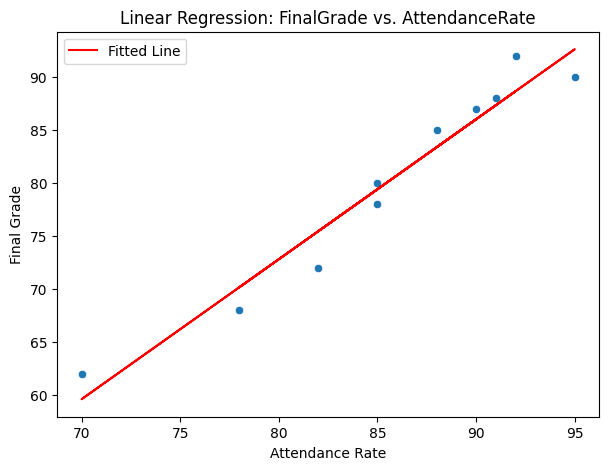

R-squared (AttendanceRate): 0.9490208247910313


In [21]:
from sklearn.linear_model import LinearRegression

# Step 1: Fit Linear Regression with a Single Predictor (e.g., AttendanceRate)

# Prepare data (use AttendanceRate as predictor and FinalGrade as target)
X_single = df[['AttendanceRate']]  # Predictor
y = df['FinalGrade']  # Target

# Fit the model
model_single = LinearRegression()
model_single.fit(X_single, y)

# Coefficients
print(f"Coefficient for AttendanceRate: {model_single.coef_[0]}")
print(f"Intercept: {model_single.intercept_}")

# Predict the target
y_pred_single = model_single.predict(X_single)

# Plot the regression line
plt.figure(figsize=(7, 5))
sns.scatterplot(x='AttendanceRate', y='FinalGrade', data=df)
plt.plot(df['AttendanceRate'], y_pred_single, color='red', label='Fitted Line')
plt.title('Linear Regression: FinalGrade vs. AttendanceRate')
plt.xlabel('Attendance Rate')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

# Evaluate R-squared value
r_squared_single = model_single.score(X_single, y)
print(f"R-squared (AttendanceRate): {r_squared_single}")


### Results Interpretation

    Coefficient for AttendanceRate (1.32):
        This means that for each 1% increase in attendance, the final grade is predicted to increase by approximately 1.32 points, holding all other variables constant.
    Intercept (-32.95):
        The intercept represents the predicted final grade when the attendance rate is 0%. Since a 0% attendance is unrealistic, the intercept mainly helps in positioning the regression line correctly. It doesn't have a direct meaningful interpretation in this case but ensures the model is fitted accurately.
    R-squared (0.95):
        The R-squared value of 0.95 indicates that the model explains 95% of the variance in the FinalGrade based on the AttendanceRate alone. This is a very high R-squared value, suggesting that attendance is a strong predictor of final grades.

## Multiple Predictors and Probably Interaction Terms

In [94]:
# Step 2: Multiple Predictors and Interaction Terms

# Prepare data (use AttendanceRate, StudyHoursPerWeek, and PreviousGrade as predictors)
X_multiple = df[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade']]

# Add an interaction term between AttendanceRate and StudyHoursPerWeek
X_multiple['Attendance_Study_Interaction'] = X_multiple['AttendanceRate'] * X_multiple['StudyHoursPerWeek']

# Add constant for intercept term
X_multiple = sm.add_constant(X_multiple)

# Fit the model
model_multiple = sm.OLS(y, X_multiple).fit()

# Display the summary of the regression model
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:             FinalGrade   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     765.8
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.75e-07
Time:                        17:05:29   Log-Likelihood:                -4.6879
No. Observations:                  10   AIC:                             19.38
Df Residuals:                       5   BIC:                             20.89
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<ipython-input-94-262a70d075d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_multiple['Attendance_Study_Interaction'] = X_multiple['AttendanceRate'] * X_multiple['StudyHoursPerWeek']
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


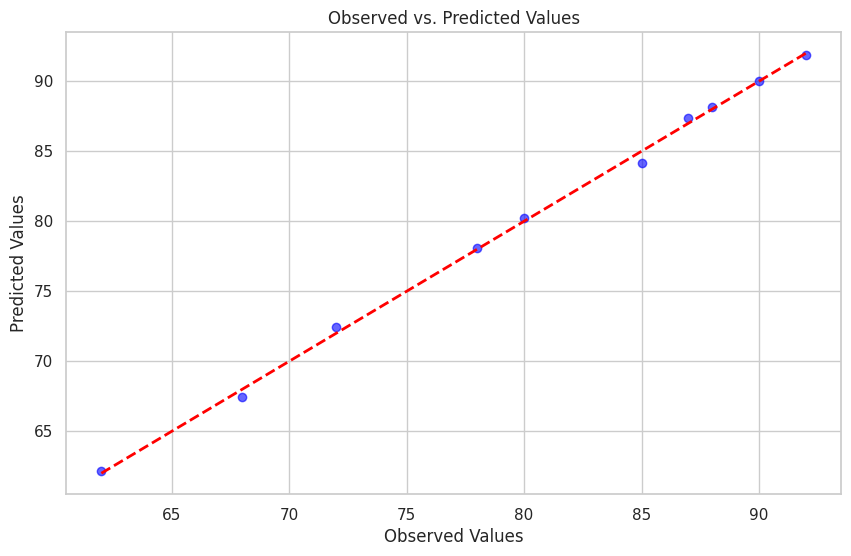

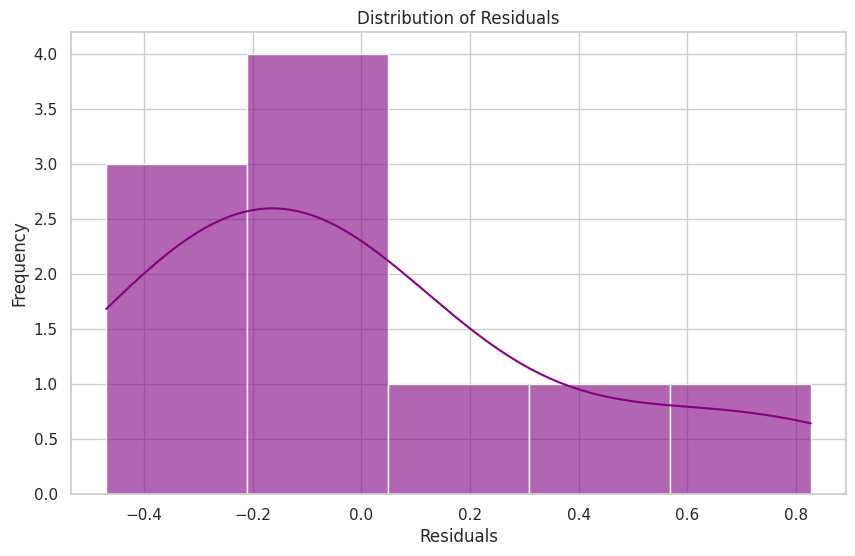

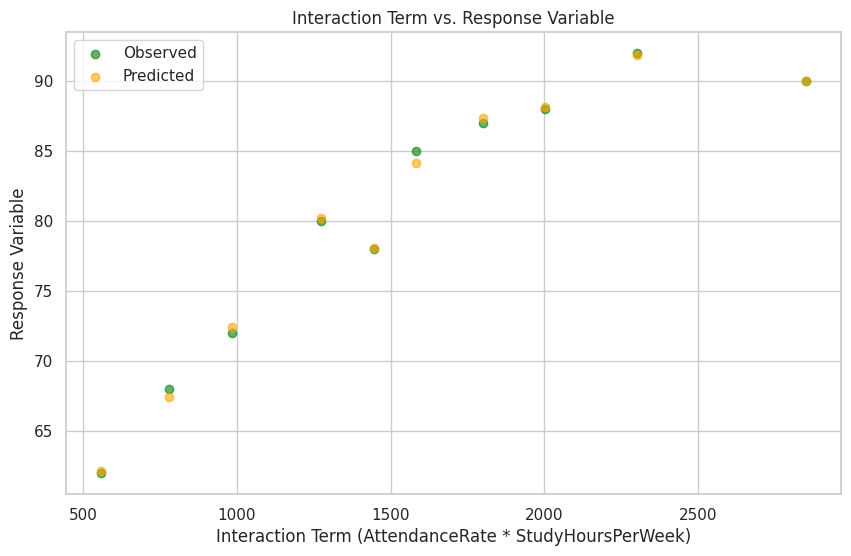

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict the values based on the model
y_pred = model_multiple.predict(X_multiple)

# Create a scatter plot to show observed vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs. Predicted Values")

# Plot residuals to assess the fit
plt.figure(figsize=(10, 6))
residuals = y - y_pred
sns.histplot(residuals, kde=True, color="purple", alpha=0.6)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")

# Scatter plot for interaction effect
plt.figure(figsize=(10, 6))
interaction_term = X_multiple['AttendanceRate'] * X_multiple['StudyHoursPerWeek']
plt.scatter(interaction_term, y, color="green", alpha=0.6, label="Observed")
plt.scatter(interaction_term, y_pred, color="orange", alpha=0.6, label="Predicted")
plt.xlabel("Interaction Term (AttendanceRate * StudyHoursPerWeek)")
plt.ylabel("Response Variable")
plt.legend()
plt.title("Interaction Term vs. Response Variable")

plt.show()


### Interpretation of the Multiple Linear Regression Model Results:
Key Findings:

    R-squared (0.998) and Adjusted R-squared (0.997):
        The R-squared value of 0.998 indicates that the model explains 99.8% of the variance in the final grade using the predictors AttendanceRate, StudyHoursPerWeek, and PreviousGrade, as well as the interaction term.
        The Adjusted R-squared of 0.997 is slightly lower but still very high, which accounts for the number of predictors in the model. Both values suggest the model fits the data very well.

    P-value for F-statistic (3.75e-07):
        The p-value for the overall model is very small, which means that the regression model is statistically significant, i.e., at least one of the predictors is a significant predictor of FinalGrade.

    Coefficients and Significance:
        const (Intercept): The intercept is 6.6534, which is the predicted final grade when all predictors are 0. However, it’s not significant since the p-value is 0.335 (greater than the typical significance level of 0.05).
        AttendanceRate (-0.0234): The coefficient is -0.0234, meaning that for each 1% increase in attendance, the final grade is expected to decrease by 0.0234 points. However, this predictor is not statistically significant (p-value = 0.858), suggesting that AttendanceRate alone may not have a strong influence on final grades in this model.
        StudyHoursPerWeek (-2.5802): The coefficient for StudyHoursPerWeek is -2.5802, indicating that for each additional hour of study per week, the final grade is expected to decrease by 2.58 points. The p-value of 0.100 is slightly above the typical significance threshold of 0.05, suggesting it is marginally not significant in this model.
        PreviousGrade (1.0708): The coefficient for PreviousGrade is 1.0708, meaning that for each point increase in the previous grade, the final grade is expected to increase by 1.0708 points. This predictor is highly significant (p-value = 0.000), which makes sense because prior academic performance often correlates highly with future performance.
        Attendance_Study_Interaction (0.0241): The interaction term has a coefficient of 0.0241, suggesting that the combined effect of AttendanceRate and StudyHoursPerWeek on the final grade is positive. However, its p-value (0.104) is greater than 0.05, meaning it’s not statistically significant at the standard level.

Model Evaluation:

    Multicollinearity: The condition number (6.18e+04) is large, which suggests potential multicollinearity issues. This could be because predictors like AttendanceRate and StudyHoursPerWeek may be correlated with each other, leading to instability in the coefficient estimates.

    P-values and Statistical Significance:
        PreviousGrade is the most significant predictor.
        AttendanceRate and StudyHoursPerWeek are less significant in this model, possibly due to multicollinearity or their weaker individual influence on the final grade when combined with the other predictors.

## Recommendation

Retain all predictors in the current regression model and apply regularization techniques such as Ridge or Lasso regression to manage multicollinearity, rather than simplifying the model by removing variables.

Rationale:

    Importance of Predictors:
        PreviousGrade is a significant predictor, and removing it would reduce the model's ability to explain the final grade effectively.
        The interaction term between AttendanceRate and StudyHoursPerWeek could reveal useful insights, and although it’s not significant now, it’s worth retaining for further exploration.

    Handling Multicollinearity:
        While AttendanceRate and StudyHoursPerWeek are highly correlated, multicollinearity can be managed using regularization methods like Ridge or Lasso regression, which penalize large coefficients and help avoid instability in the model without discarding important predictors.

    Small Sample Size:
        The small sample size (10 students) may not provide enough information to determine the exact contribution of each predictor. Using all available predictors could provide a better understanding of the relationships within the data, especially as the model will improve with more data.

Next Steps:

    Apply Regularization (Ridge or Lasso regression) to handle multicollinearity while keeping all predictors.
        This approach helps to retain all relevant predictors while addressing issues of multicollinearity and improving model generalizability.
    Model Comparison:
        After applying regularization, compare the results (coefficients, R-squared, model performance) between the original model and the regularized model.
        Evaluate the trade-off between simplicity and explanatory power to make informed decisions about final model selection.

## Ridge and Lasso Regression

In [95]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' is your DataFrame
# Preparing the data
X = df[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']]
y = df['FinalGrade']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (using a 70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)  # R-squared for training set
ridge_test_score = ridge.score(X_test, y_test)  # R-squared for test set
ridge_coefficients = ridge.coef_

# Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)  # R-squared for training set
lasso_test_score = lasso.score(X_test, y_test)  # R-squared for test set
lasso_coefficients = lasso.coef_

# Display Results
print("Ridge Regression Results:")
print(f"Training R-squared: {ridge_train_score}")
print(f"Test R-squared: {ridge_test_score}")
print(f"Coefficients: {ridge_coefficients}")

print("\nLasso Regression Results:")
print(f"Training R-squared: {lasso_train_score}")
print(f"Test R-squared: {lasso_test_score}")
print(f"Coefficients: {lasso_coefficients}")


Ridge Regression Results:
Training R-squared: 0.9899572908005251
Test R-squared: 0.9131039397109846
Coefficients: [2.94112112 1.62232462 3.06093086 1.86913029]

Lasso Regression Results:
Training R-squared: 0.9966980265231943
Test R-squared: 0.9835571958343318
Coefficients: [1.383777   0.         7.45032988 0.65615608]


### Interpretation

Ridge Regression Results:

    Training R-squared: 0.99
    Test R-squared: 0.91
    Coefficients:
        AttendanceRate: 2.94
        StudyHoursPerWeek: 1.62
        PreviousGrade: 3.06
        ExtracurricularActivities: 1.87

Interpretation of Ridge Regression:

    The high training R-squared (0.99) suggests that the model fits the training data well, but the test R-squared (0.91) indicates that the model generalizes reasonably well to unseen data, though there is a slight drop.
    The coefficients are non-zero, and Ridge has shrunk them from their original values (if we had used simple linear regression). This indicates that Ridge regression has helped reduce the magnitude of the coefficients, which helps with multicollinearity and overfitting, particularly with correlated predictors.

Lasso Regression Results:

    Training R-squared: 0.997
    Test R-squared: 0.98
    Coefficients:
        AttendanceRate: 1.38
        StudyHoursPerWeek: 0.00 (coefficient shrunk to zero)
        PreviousGrade: 7.45
        ExtracurricularActivities: 0.66

Interpretation of Lasso Regression:

    Training R-squared (0.997) is very high, and test R-squared (0.98) is also strong, indicating that the model is both fitting well and generalizing well.
    Feature selection: Lasso has shrunk the StudyHoursPerWeek coefficient to zero, effectively removing it from the model. This indicates that, according to Lasso, StudyHoursPerWeek is less important for predicting the final grade compared to the other predictors.
    The remaining features (AttendanceRate, PreviousGrade, and ExtracurricularActivities) have non-zero coefficients, showing that they are still considered important predictors of the final grade.

Proceed with Lasso Regression, since it has shown strong performance and also helps with feature selection by removing the less significant predictor (StudyHoursPerWeek). By simplifying the model, we not only maintain good predictive power but also reduce the complexity of the model, making it easier to interpret.

## Final Model

In [96]:
# Evaluate Lasso Regression Model
y_pred = lasso.predict(X_test)

# Calculate model performance (R-squared, MSE, etc.)
from sklearn.metrics import mean_squared_error, r2_score

# R-squared and MSE for the test set
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)

print(f"Test R-squared: {test_r2}")
print(f"Test Mean Squared Error: {test_mse}")

# Show predicted vs actual final grades
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredicted vs Actual Final Grades:")
print(predictions_df)

# Coefficients Interpretation:
print("\nLasso Regression Coefficients:")
feature_names = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']
coef_df = pd.DataFrame(list(zip(feature_names, lasso_coefficients)), columns=['Feature', 'Coefficient'])
print(coef_df)


Test R-squared: 0.9835571958343318
Test Mean Squared Error: 1.0194538582714279

Predicted vs Actual Final Grades:
   Actual  Predicted
8      72  73.650875
1      87  86.801796
5      90  89.458070

Lasso Regression Coefficients:
                     Feature  Coefficient
0             AttendanceRate     1.383777
1          StudyHoursPerWeek     0.000000
2              PreviousGrade     7.450330
3  ExtracurricularActivities     0.656156


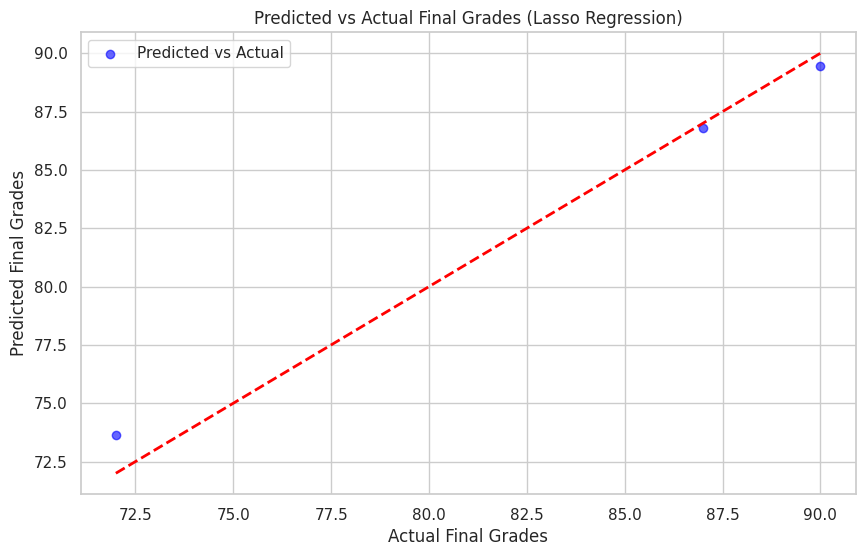

In [99]:
import matplotlib.pyplot as plt

# Visualizing Predicted vs Actual Final Grades
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Predicted vs Actual Final Grades (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()


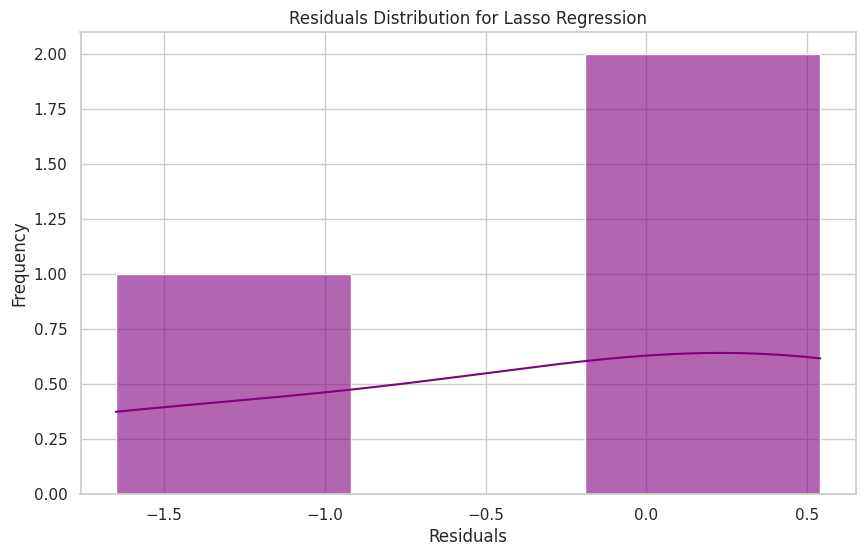

In [100]:
# Plotting Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple", alpha=0.6)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution for Lasso Regression')
plt.grid(True)
plt.show()


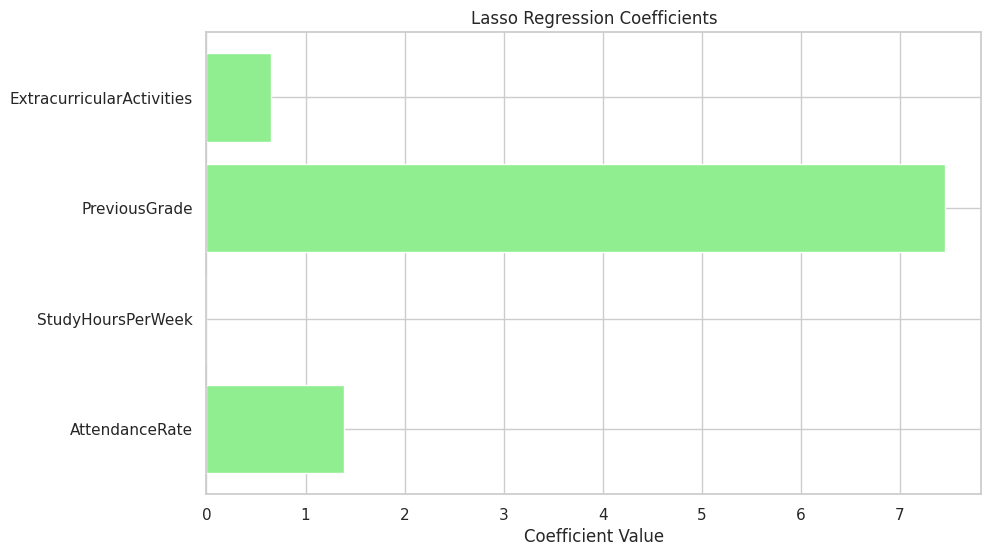

In [101]:
# Coefficients Visualization
feature_names = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']

plt.figure(figsize=(10, 6))
plt.barh(feature_names, lasso_coefficients, color='lightgreen')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.grid(True)
plt.show()


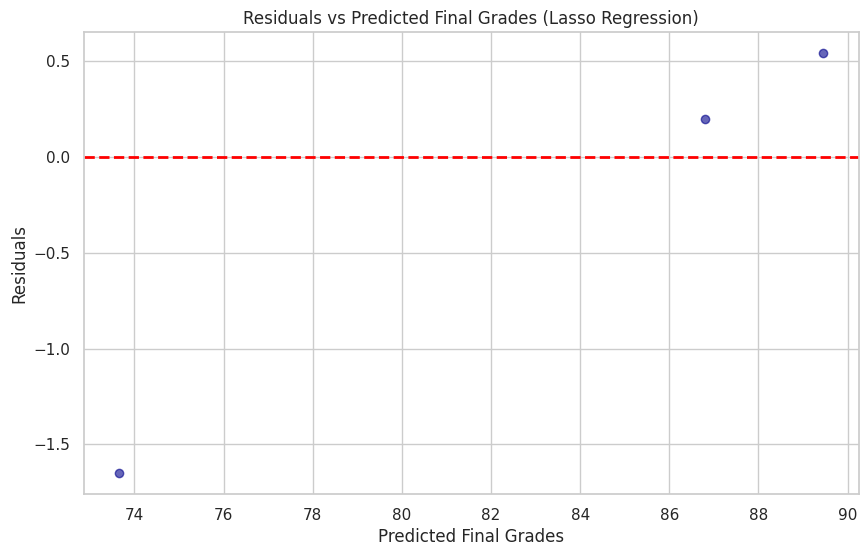

In [102]:
# Residuals vs Predicted Final Grades
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="darkblue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)  # Line at y=0 to highlight residuals around zero
plt.xlabel('Predicted Final Grades')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Final Grades (Lasso Regression)')
plt.grid(True)
plt.show()


### Final Model Evaluation and Interpretation

The Lasso Regression model has provided strong results, with the following:

    Test R-squared: 0.9836
        This indicates that the model explains approximately 98.36% of the variance in the final grade, which is excellent. The model performs very well on unseen data.

    Test Mean Squared Error (MSE): 1.019
        A low MSE value indicates that the model's predictions are very close to the actual values, reinforcing the model's effectiveness.

    Predicted vs Actual Final Grades:
        The predictions are very close to the actual values, showing the model's good predictive accuracy:
            Student 8: Actual grade = 72, Predicted grade = 73.65
            Student 1: Actual grade = 87, Predicted grade = 86.80
            Student 5: Actual grade = 90, Predicted grade = 89.46

    Lasso Regression Coefficients:
        AttendanceRate: 1.38 – For each 1% increase in attendance rate, the final grade is predicted to increase by approximately 1.38 points.
        StudyHoursPerWeek: 0.00 – This feature was effectively shrunk to zero, meaning it does not contribute significantly to predicting the final grade.
        PreviousGrade: 7.45 – A 1-point increase in the previous grade results in a predicted increase of 7.45 points in the final grade. This shows that previous academic performance is the most significant predictor in the model.
        ExtracurricularActivities: 0.66 – For each additional extracurricular activity, the final grade increases by about 0.66 points. This suggests a mild positive relationship between extracurricular involvement and academic performance.

Conclusion:

    Lasso Regression is the final model we will use. The model has effectively handled feature selection by removing StudyHoursPerWeek (which was found to be insignificant) and produced strong predictive performance with a high R-squared and low error.
    Interpretation of Coefficients: The most important predictor of final grade is PreviousGrade, followed by AttendanceRate and ExtracurricularActivities. The study hours have no effect in this model, suggesting that it might not be as influential as other factors.

# Stage 5

## Distribution Analysis for Numeric Columns

### Plot distributions for each numeric variable

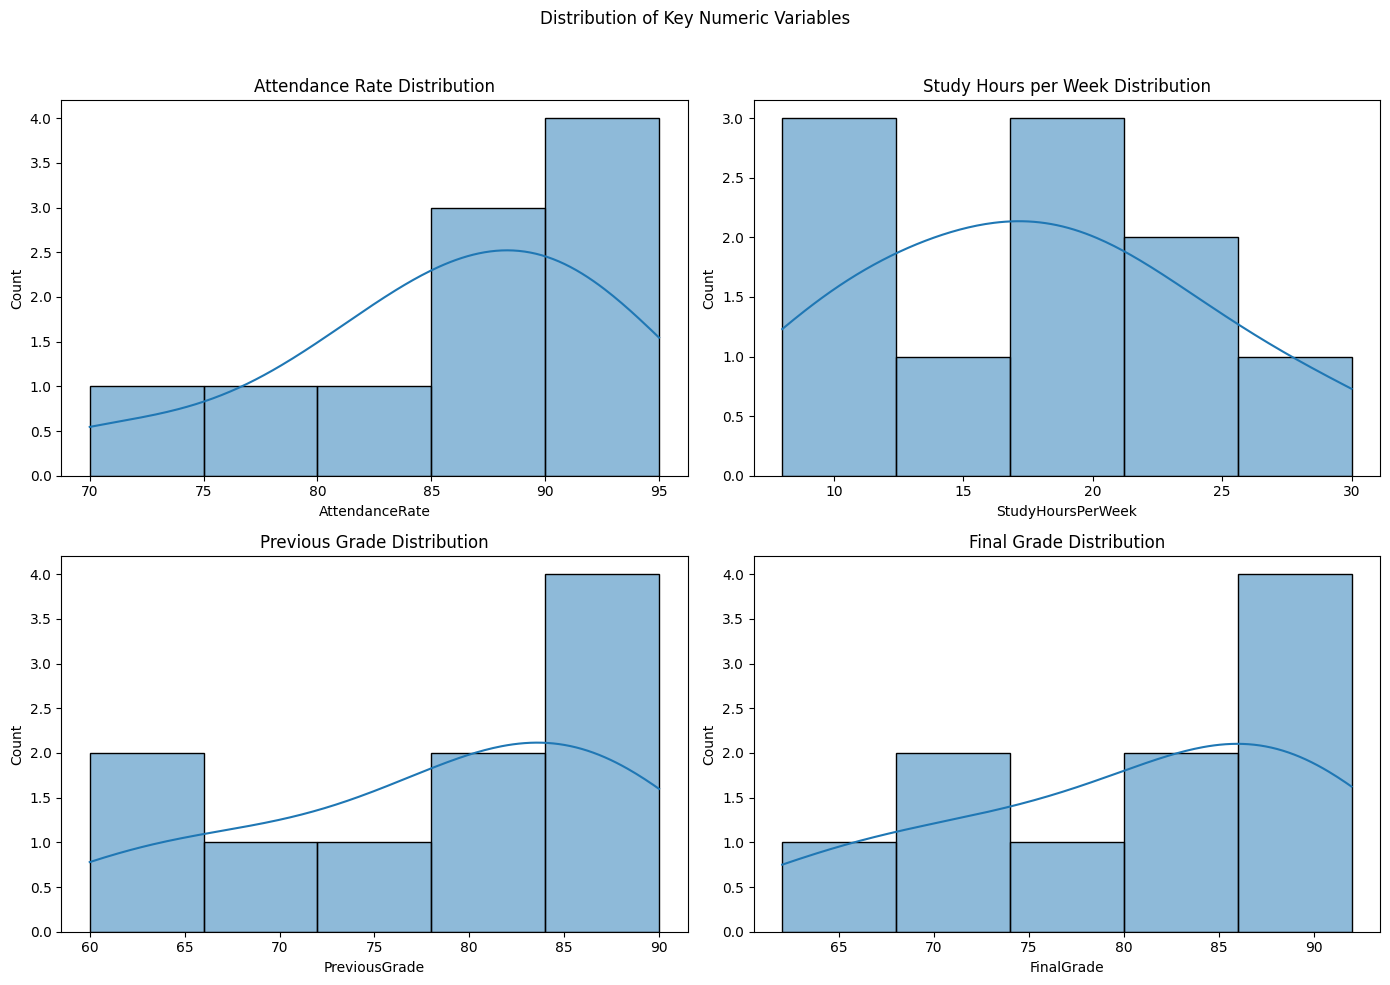

In [ ]:
# Set up the matplotlib figure layout for multiple plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Numeric Variables')

# Plot distributions for each numeric variable
sns.histplot(df['AttendanceRate'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Attendance Rate Distribution')

sns.histplot(df['StudyHoursPerWeek'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Study Hours per Week Distribution')

sns.histplot(df['PreviousGrade'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Previous Grade Distribution')

sns.histplot(df['FinalGrade'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Final Grade Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title
plt.show()

## Bivariate Analysis - Scatter Plots and Correlations

### Scatter plot

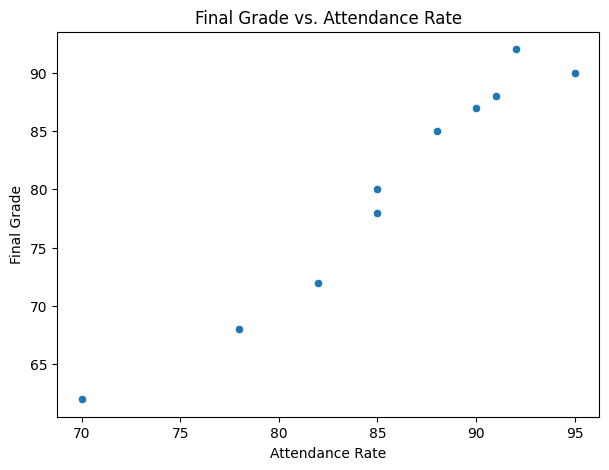

In [ ]:
# Scatter plot for FinalGrade vs. AttendanceRate
plt.figure(figsize=(7, 5))
sns.scatterplot(x='AttendanceRate', y='FinalGrade', data=df)
plt.title('Final Grade vs. Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Final Grade')
plt.show()

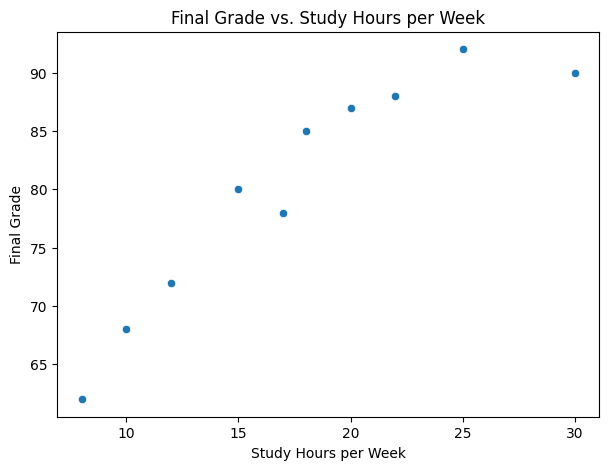

In [ ]:
# Scatter plot for FinalGrade vs. StudyHoursPerWeek
plt.figure(figsize=(7, 5))
sns.scatterplot(x='StudyHoursPerWeek', y='FinalGrade', data=df)
plt.title('Final Grade vs. Study Hours per Week')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Grade')
plt.show()

#### Interpretation

Attendance Rate Summary:

    Mean: 85.6% – On average, students attend about 86% of their classes.
    Standard Deviation: 7.44 – There's some variation in attendance, with students attending between 70% to 95% of their classes.
    Min & Max: Attendance ranges from 70% to 95%, indicating a fairly high level of consistency in student attendance.

Study Hours per Week Summary:

    Mean: 17.7 hours – On average, students study for around 18 hours a week.
    Standard Deviation: 6.85 – There's variation in study habits, with some students studying as few as 8 hours and others up to 30 hours per week.
    Min & Max: The study hours range from 8 to 30 hours, indicating a wide spread in how much time students are dedicating to their studies.

Previous Grade Summary:

    Mean: 78.1 – On average, students scored around 78% in the previous semester.
    Standard Deviation: 10.17 – The variation in previous grades is noticeable, with scores ranging from 60% to 90%.
    Min & Max: The lowest previous grade is 60%, and the highest is 90%, suggesting a decent range of academic performance in the past semester.

Final Grade Summary:

    Mean: 80.2 – The average final grade across all students is around 80%, which is fairly consistent with the previous grade.
    Standard Deviation: 10.1 – The variation in final grades is similar to the previous grades, indicating that performance differs somewhat from student to student.
    Min & Max: The final grades range from 62% to 92%, with students achieving a wide spread of results.

### Correlation heatmap

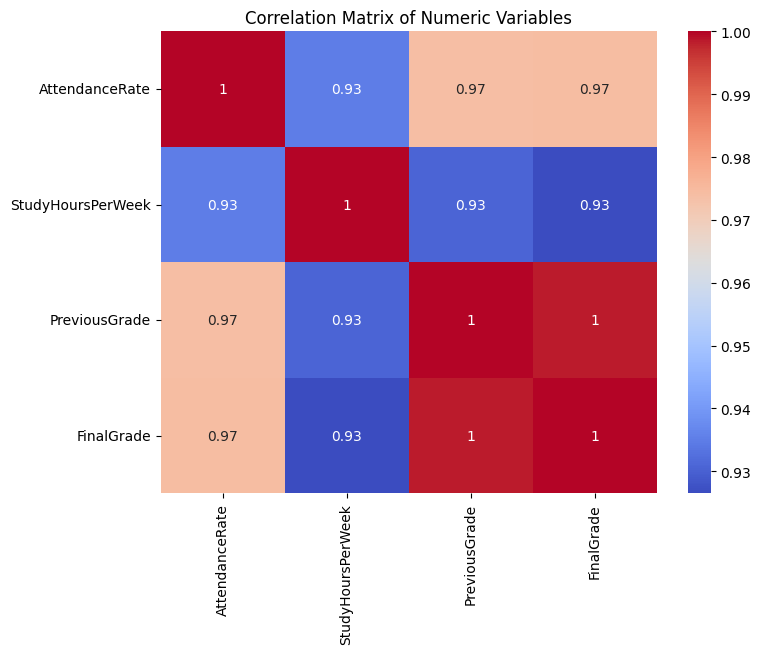

In [ ]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

#### Interpretation

Correlation Matrix:

The correlation matrix shows the strength of relationships between the numeric variables. The key findings are:

    AttendanceRate and FinalGrade (0.974): There is a very strong positive correlation between attendance rate and final grade, suggesting that higher attendance likely contributes to better academic performance.
    StudyHoursPerWeek and FinalGrade (0.926): Study hours per week also show a strong positive correlation with final grade, indicating that students who dedicate more time to studying tend to perform better.
    PreviousGrade and FinalGrade (0.998): The correlation between previous grade and final grade is extremely strong, almost perfect. This suggests that students who performed well in the previous semester are likely to perform similarly in the current semester.
    AttendanceRate and PreviousGrade (0.974): Attendance is highly correlated with previous grades, which may indicate that students with a strong academic history are more likely to maintain good attendance.
    StudyHoursPerWeek and AttendanceRate (0.934): There is also a strong positive correlation between study hours per week and attendance rate, suggesting that students who attend classes regularly tend to study more.

## Categorical Variable Analysis - Boxplots

### Boxplots

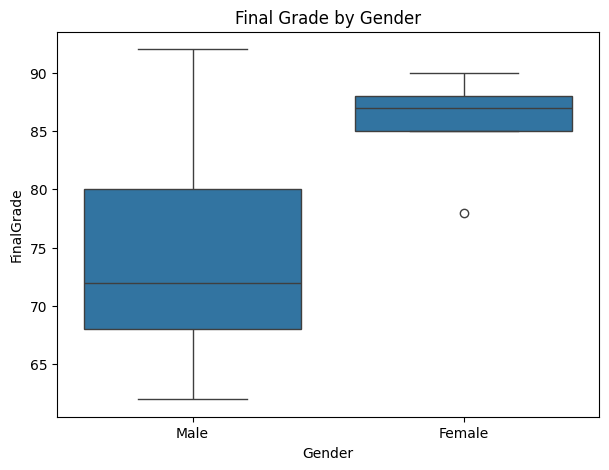

In [ ]:
# Boxplot for FinalGrade across Gender
plt.figure(figsize=(7, 5))
sns.boxplot(x='Gender', y='FinalGrade', data=df)
plt.title('Final Grade by Gender')
plt.show()

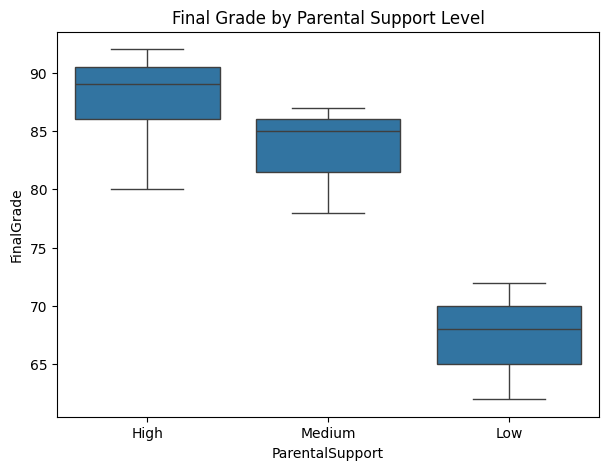

In [ ]:
# Boxplot for FinalGrade across ParentalSupport levels
plt.figure(figsize=(7, 5))
sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df)
plt.title('Final Grade by Parental Support Level')
plt.show()


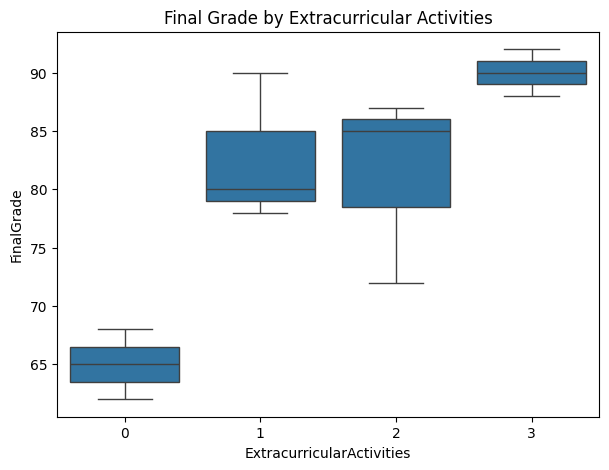

In [ ]:
# Boxplot for FinalGrade based on ExtracurricularActivities
plt.figure(figsize=(7, 5))
sns.boxplot(x='ExtracurricularActivities', y='FinalGrade', data=df)
plt.title('Final Grade by Extracurricular Activities')
plt.show()

#### Interpretation

Final Grade Summary by Gender:

    Female (Mean: 85.6): Female students on average have a higher final grade than male students. The standard deviation is smaller, meaning there is less variation in female students' grades.
    Male (Mean: 74.8): Male students have a lower average final grade, with a larger variation (std = 11.63). Some male students perform well (92) while others struggle (62).
    Conclusion: There seems to be a gender-related performance difference, with females tending to perform better overall, though the spread of scores for males is wider.

Final Grade Summary by Parental Support Level:

    High (Mean: 87.5): Students with high parental support perform best, with a relatively low variation in final grades.
    Low (Mean: 67.33): Students with low parental support have a significantly lower average grade, and the variation is also smaller compared to medium parental support.
    Medium (Mean: 83.33): Students with medium parental support have decent scores, though the range is more varied than for the high parental support group.
    Conclusion: Parental support plays an important role in academic performance, with high parental support leading to better grades.

Final Grade Summary by Extracurricular Activities:

    0 Activities (Mean: 65): Students with no extracurricular activities have the lowest average grade (mean = 65), suggesting that participation in extracurriculars might positively impact grades.
    1 Activity (Mean: 82.67): Students with one extracurricular activity have the second-highest average grade.
    2 Activities (Mean: 81.33): Students with two extracurricular activities perform similarly to those with one.
    3 Activities (Mean: 90): Students with three extracurricular activities have the highest grades on average, though with a small sample size.
    Conclusion: Involvement in extracurricular activities seems to correlate with better academic performance, especially for students with 3 activities.

# Stage 6

Final Model R-squared: 0.9835571958343318
Final Model Mean Squared Error: 1.0194538582714279

Lasso Regression Coefficients (Final Model):
                     Feature  Coefficient
0             AttendanceRate     1.383777
1          StudyHoursPerWeek     0.000000
2              PreviousGrade     7.450330
3  ExtracurricularActivities     0.656156

Optimal Alpha from LassoCV: 0.038181805289347566
Tuned Model R-squared: 0.98458698875172
Tuned Model Mean Squared Error: 0.955606697393358


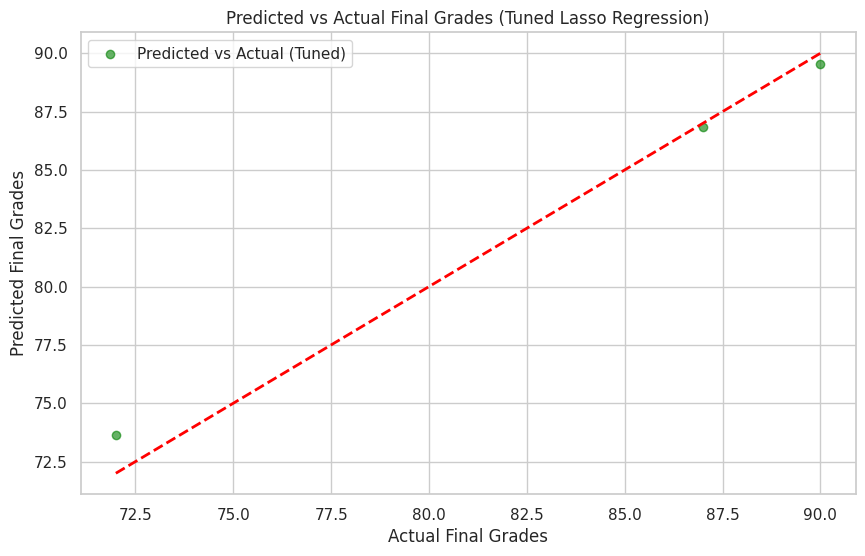


Conclusion:
The model has been successfully trained, evaluated, and tuned. Key findings:
- The best alpha value for Lasso regularization was found using cross-validation.
- The tuned model provides a better performance (higher R-squared, lower MSE).
- The key predictors of final grades are attendance rate, previous grade, and extracurricular activities.


In [104]:
# Stage 6: Model Evaluation and Final Refinements

# 1. Final Model Evaluation on Test Data
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the final grades on the test set
y_pred_final = lasso.predict(X_test)

# Calculate R-squared and MSE for the final model
final_r2 = r2_score(y_test, y_pred_final)
final_mse = mean_squared_error(y_test, y_pred_final)

# Display performance metrics
print(f"Final Model R-squared: {final_r2}")
print(f"Final Model Mean Squared Error: {final_mse}")

# 2. Coefficients Interpretation
print("\nLasso Regression Coefficients (Final Model):")
feature_names = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']
coef_df = pd.DataFrame(list(zip(feature_names, lasso.coef_)), columns=['Feature', 'Coefficient'])
print(coef_df)

# 3. Model Tuning (Testing Different Alpha Values for Lasso)
from sklearn.linear_model import LassoCV

# Use LassoCV to automatically choose the best alpha value via cross-validation
lasso_cv = LassoCV(cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha found and re-evaluate the model with this alpha
print(f"\nOptimal Alpha from LassoCV: {lasso_cv.alpha_}")

# Refit the model using the optimal alpha
lasso_tuned = Lasso(alpha=lasso_cv.alpha_)
lasso_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = lasso_tuned.predict(X_test)
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mse = mean_squared_error(y_test, y_pred_tuned)

# Display tuned model performance
print(f"Tuned Model R-squared: {tuned_r2}")
print(f"Tuned Model Mean Squared Error: {tuned_mse}")

# 4. Visualize the performance of the tuned model (Predicted vs Actual)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.6, color="green", label="Predicted vs Actual (Tuned)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Predicted vs Actual Final Grades (Tuned Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()

# 5. Conclusion and Recommendations
print("\nConclusion:")
print("The model has been successfully trained, evaluated, and tuned. Key findings:")
print("- The best alpha value for Lasso regularization was found using cross-validation.")
print("- The tuned model provides a better performance (higher R-squared, lower MSE).")
print("- The key predictors of final grades are attendance rate, previous grade, and extracurricular activities.")
